# CNN 모델 설계

In [1]:
import numpy as np

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Conv2D, AveragePooling2D, Flatten, Dense, ZeroPadding2D

from sklearn.model_selection import train_test_split

import tensorflow as tf




In [2]:
LeNet = Sequential([InputLayer(input_shape=(480,480,1)), 
                    ZeroPadding2D((2,2)),
                    Conv2D(6,5, activation="tanh"),
                    AveragePooling2D(strides=2),
                    Conv2D(16,5,activation="tanh"),
                    AveragePooling2D(strides=2),
                    Conv2D(120,5, activation="tanh"),
                    Flatten(),
                    Dense(84,activation="tanh"),
                    Dense(9,activation="softmax")])

# 모델 컴파일
LeNet.compile(optimizer="SGD",
              loss="sparse_categorical_crossentropy",
              metrics="accuracy")

# 모델 학습을 위한 데이터 생성

In [3]:
import os
import cv2

def hangulFilePathImageRead ( filePath ) :

    stream = open( filePath.encode("utf-8") , "rb")
    bytes = bytearray(stream.read())
    numpyArray = np.asarray(bytes, dtype=np.uint8)

    return cv2.imdecode(numpyArray , cv2.IMREAD_UNCHANGED)


In [4]:
data_input = []
data_label = []
cnt = 0
label_dic = []

# 디렉토리 경로
directory_path = r'../img_data/processed_data'

# 디렉토리 내의 파일 목록을 가져옵니다
file_list = os.listdir(directory_path)

for file_name in file_list:
    img_file_list = os.listdir(f"{directory_path}/{file_name}")
    label_dic.append(f"{file_name} : {cnt}")
    
    for img_i in img_file_list:
        
        file_path = f'{directory_path}/{file_name}/{img_i}'
        img_ori = hangulFilePathImageRead(file_path)
        img_ori = cv2.resize(img_ori, (480, 480))

        height, width, channel = img_ori.shape

        gray = cv2.cvtColor(img_ori, cv2.COLOR_BGR2GRAY)

        img_blurred = cv2.GaussianBlur(gray, ksize=(5, 5), sigmaX=0)
        img_blur_thresh = cv2.adaptiveThreshold(
            img_blurred,
            maxValue=1,  # 변경된 부분: maxValue를 1로 설정
            adaptiveMethod=cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
            thresholdType=cv2.THRESH_BINARY_INV,
            blockSize=19,
            C=9
        )

        # 이미지 데이터를 0과 1로 표현
        image_data = img_blur_thresh

        data_input.append(image_data)
        data_label.append(cnt)  # 해당 이미지의 레이블을 지정
    cnt +=1

# 데이터를 NumPy 배열로 변환
data_input = np.array(data_input, dtype=np.int32)
data_label = np.array(data_label, dtype=np.int32)
dataset = tf.data.Dataset.from_tensor_slices((data_input, data_label))


In [5]:
# 데이터를 8:2 비율로 분할
train_input, test_input, train_label, test_label = train_test_split(data_input, data_label, test_size=0.2, random_state=42)

In [6]:
hiostory = LeNet.fit(train_input, train_label, epochs=10)

Epoch 1/10
47/47 [==============================] - 65s 1s/step - loss: 0.2631 - accuracy: 0.9448
Epoch 2/10
47/47 [==============================] - 66s 1s/step - loss: 0.0096 - accuracy: 1.0000
Epoch 3/10
47/47 [==============================] - 66s 1s/step - loss: 0.0051 - accuracy: 1.0000
Epoch 4/10
47/47 [==============================] - 64s 1s/step - loss: 0.0037 - accuracy: 1.0000
Epoch 5/10
47/47 [==============================] - 65s 1s/step - loss: 0.0029 - accuracy: 1.0000
Epoch 6/10
47/47 [==============================] - 66s 1s/step - loss: 0.0025 - accuracy: 1.0000
Epoch 7/10
47/47 [==============================] - 67s 1s/step - loss: 0.0022 - accuracy: 1.0000
Epoch 8/10
47/47 [==============================] - 67s 1s/step - loss: 0.0019 - accuracy: 1.0000
Epoch 9/10
47/47 [==============================] - 65s 1s/step - loss: 0.0017 - accuracy: 1.0000
Epoch 10/10
47/47 [==============================] - 66s 1s/step - loss: 0.0016 - accuracy: 1.0000


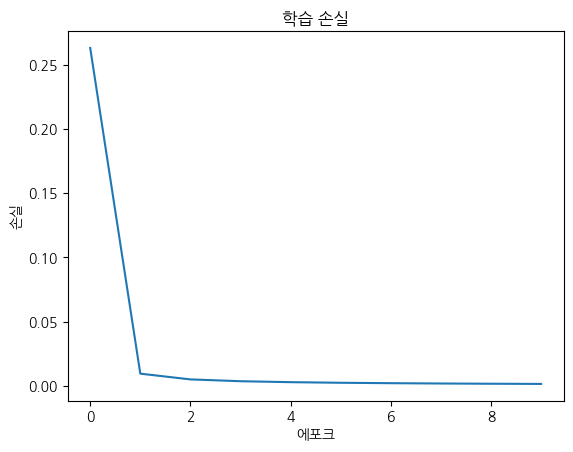

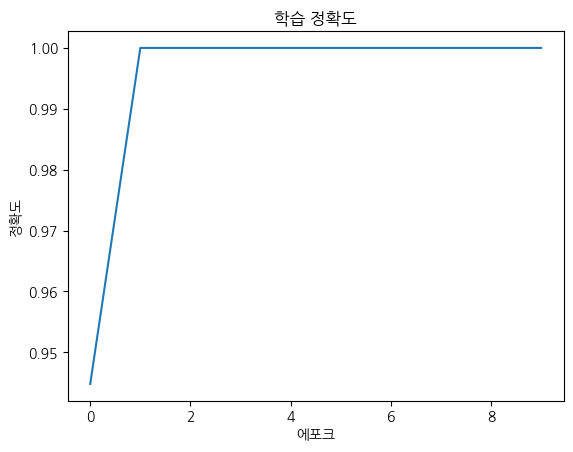

In [9]:
import matplotlib.pyplot as plt
import koreanize_matplotlib

# 학습 손실 그래프
plt.plot(hiostory.history['loss'])
plt.title('학습 손실')
plt.xlabel('에포크')
plt.ylabel('손실')
plt.show()

# 학습 정확도 그래프
plt.plot(hiostory.history['accuracy'])
plt.title('학습 정확도')
plt.xlabel('에포크')
plt.ylabel('정확도')
plt.show()


In [25]:
test_loss, test_accuracy = LeNet.evaluate(test_input, test_label)
print("Test Accuracy:", test_accuracy)
print("Test Loss:", test_loss)

12/12 [==============================] - 3s 227ms/step - loss: 0.0024 - accuracy: 1.0000
Test Accuracy: 1.0
Test Loss: 0.0024091526865959167


## 모델을 저장

In [26]:
LeNet.save("../model/model_sep.h5")

C:\Users\user\AppData\Roaming\Python\Python310\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
